In [47]:
import pandas as pd
import numpy as np

In [48]:
ds = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [49]:
ds.shape

(299, 13)

In [50]:
ds.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [51]:
import matplotlib.pyplot as plt
import pylab as pl

ds.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('deaths_hist')
plt.show()

In [1]:
#time feature is not relevant in this dataset
if 'time' in ds:
    del ds['time']

NameError: name 'ds' is not defined

In [29]:
# you can see time feature is removed
ds.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


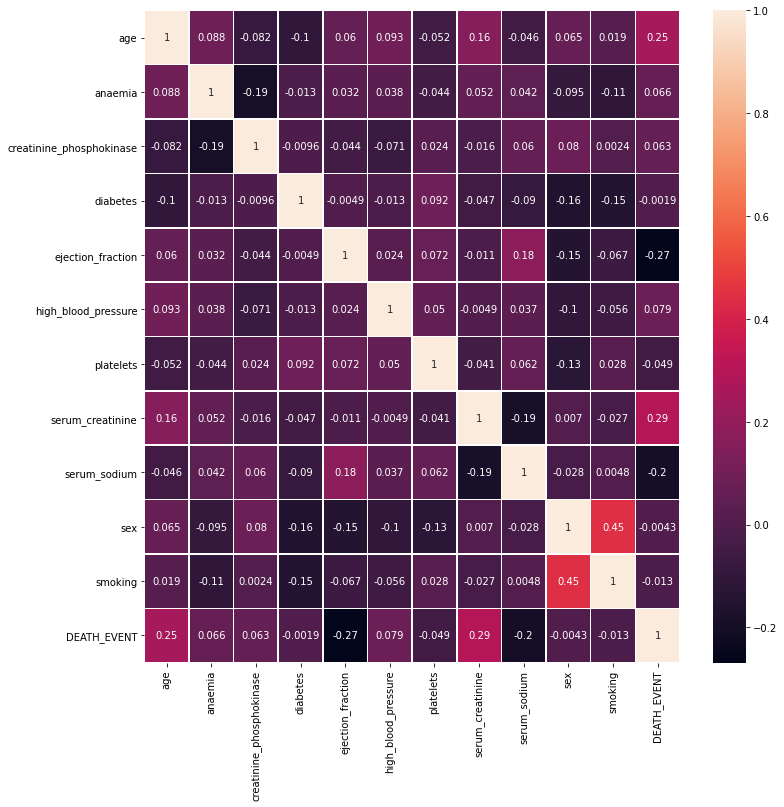

In [30]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(ds.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

In [31]:
# Feature Selection 1
# If the absolute value of the correlation to "DEATH_EVENT" > 0.1 feature will be selected
cor = ds.corr() 
corr_target = abs(cor["DEATH_EVENT"])
relevant_features = corr_target[corr_target>0.1]
print(relevant_features)

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64


In [32]:
features1x = ds.iloc[:, [0, 4, 7, 8]].values #select ejection_fraction, serum_creatinine, serum sodium and age
features1y = ds.iloc[:,-1].values # 'DEATH_EVENT' 

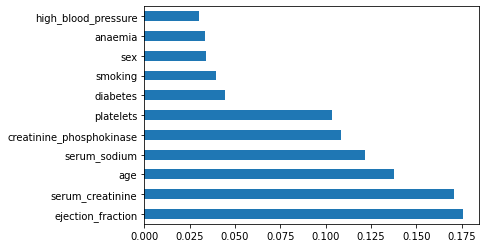

In [33]:
# Feature Selection 2. We can do tests with different classifiers with these features and the features from 'Feature Selection 1' above

x = ds.iloc[:, :-1] # x = everything but 'DEATH_EVENT'

y = ds.iloc[:,-1] # y = 'DEATH_EVENT'


from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [34]:
features2x = ds.iloc[:, [0, 2, 4, 6, 7, 8]] #select ejection_fraction, serum_creatinine, age, creatinine_phosphokinase, platelets, and serum_sodium

features2y = ds.iloc[:,-1].values # 'DEATH_EVENT'

In [35]:
#split data into training and test set for features 1 (ejection_fraction, serum_creatinine, serum sodium and age)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features1x, features1y, test_size=0.2, random_state=2)

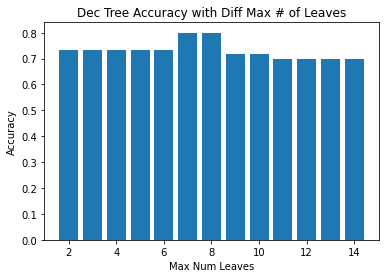

In [36]:
#Decision Tree Classifier for first set of features: Features 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix
#lets find out the optimum max num leaf nodes
accuracies = []
for num_leaves in range(2,15):
    dec_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=num_leaves, random_state=0, criterion='entropy')
    dec_tree_classifier.fit(x_train, y_train)
    prediction = dec_tree_classifier.predict(x_test)
    acc_score = accuracy_score(y_test, prediction)
    accuracies.append(acc_score)
num_leaves = [2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.bar(num_leaves, accuracies)
plt.xlabel("Max Num Leaves")
plt.ylabel("Accuracy")
plt.title("Dec Tree Accuracy with Diff Max # of Leaves")
plt.show()
#We see max leaves == 7 or 8

<Figure size 432x288 with 0 Axes>

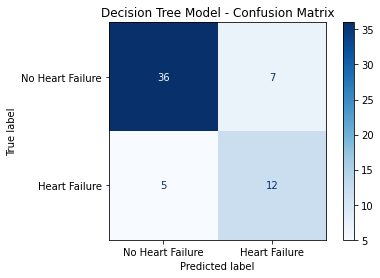

Accuracy of Decision Tree Classifier for features 1 is :  80.0 %


In [37]:
#train and predict with max num leaves = 7
dec_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0, criterion='entropy')
dec_tree_classifier.fit(x_train, y_train)
prediction = dec_tree_classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, prediction)
acc_score = accuracy_score(y_test, prediction)

plt.figure()
#plot_confusion_matrix(conf_matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plot_confusion_matrix(dec_tree_classifier, x_test, y_test, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["No Heart Failure","Heart Failure"], fontsize=10)
plt.yticks(range(2), ["No Heart Failure","Heart Failure"], fontsize=10)
plt.show()

print("Accuracy of Decision Tree Classifier for features 1 is : ",100* acc_score, "%")

In [38]:
#Now we'll do the same for second set of features: Features 2
#split data into training and test set for features 2 ejection_fraction, serum_creatinine, age, creatinine_phosphokinase, platelets, and serum_sodium
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features2x, features2y, test_size=0.2, random_state=2)

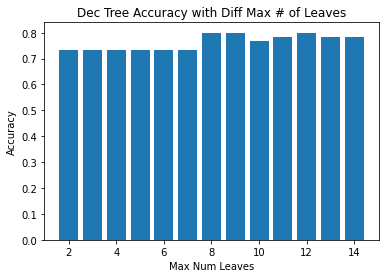

In [39]:
#Decision Tree Classifier for first set of features: Features 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix
#lets find out the optimum max num leaf nodes
accuracies = []
for num_leaves in range(2,15):
    dec_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=num_leaves, random_state=0, criterion='entropy')
    dec_tree_classifier.fit(x_train, y_train)
    prediction = dec_tree_classifier.predict(x_test)
    acc_score = accuracy_score(y_test, prediction)
    accuracies.append(acc_score)
num_leaves = [2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.bar(num_leaves, accuracies)
plt.xlabel("Max Num Leaves")
plt.ylabel("Accuracy")
plt.title("Dec Tree Accuracy with Diff Max # of Leaves")
plt.show()
#We see max leaves == 8 or 9 or 12

<Figure size 432x288 with 0 Axes>

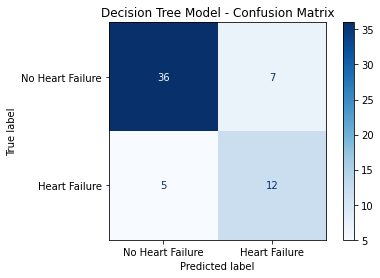

Accuracy of Decision Tree Classifier for features 2 is :  80.0 %


In [40]:
#train and predict with max num leaves = 7
dec_tree_classifier = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0, criterion='entropy')
dec_tree_classifier.fit(x_train, y_train)
prediction = dec_tree_classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, prediction)
acc_score = accuracy_score(y_test, prediction)

plt.figure()
#plot_confusion_matrix(conf_matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plot_confusion_matrix(dec_tree_classifier, x_test, y_test, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["No Heart Failure","Heart Failure"], fontsize=10)
plt.yticks(range(2), ["No Heart Failure","Heart Failure"], fontsize=10)
plt.show()

print("Accuracy of Decision Tree Classifier for features 2 is : ",100* acc_score, "%")

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

Support Vector Machine Success Rate : 76.67%


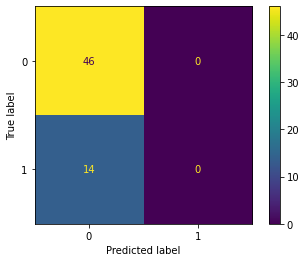

In [42]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)
p1=svm.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

K Nearest Neighbors Top 5 Success Rates:
[75.0, 75.0, 75.0, 73.33, 73.33]


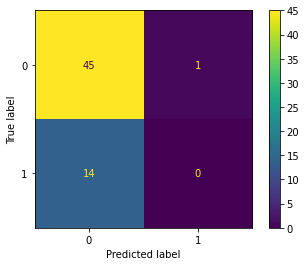

In [43]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p2=knn.predict(x_test)
    s2=accuracy_score(y_test,p2)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

Random Forest Classifier Success Rate : 81.67%


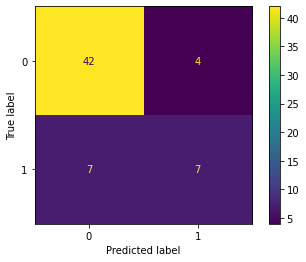

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()


Gradient Booster Classifier Success Rate : 71.67%


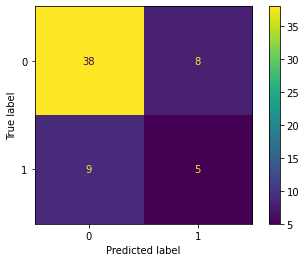

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
p4=gbc.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()


Linear Regression Success Rate : 81.67%


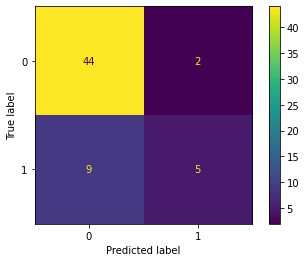

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p5=lr.predict(x_test)
s5=accuracy_score(y_test,p5)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s5))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()
